In [26]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
(x_trains, ytrains),(x_tests, y_tests) = tf.keras.datasets.mnist.load_data()
x_trains = x_trains.reshape(60000, 28, 28, 1)
x_trains = x_trains.astype('float32') / 255
x_trains

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [27]:
vertical_edge_filter = np.array([[-2, 1, 1], [-2, 1, 1], [-2, 1, 1]],dtype=float)
horizontal_edge_filter = np.array([[1, 1, 1], [1, 1, 1],[-2, -2, -2]],dtype=float)

In [28]:
img_id = 10
img_x = x_trains[img_id, :, :, 0]
img_height = 28
img_width = 28

In [29]:
vertical_edge = np.zeros_like(img_x)
horizontal_edge = np.zeros_like(img_x)

[[ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.  

(30.0, -2.0)

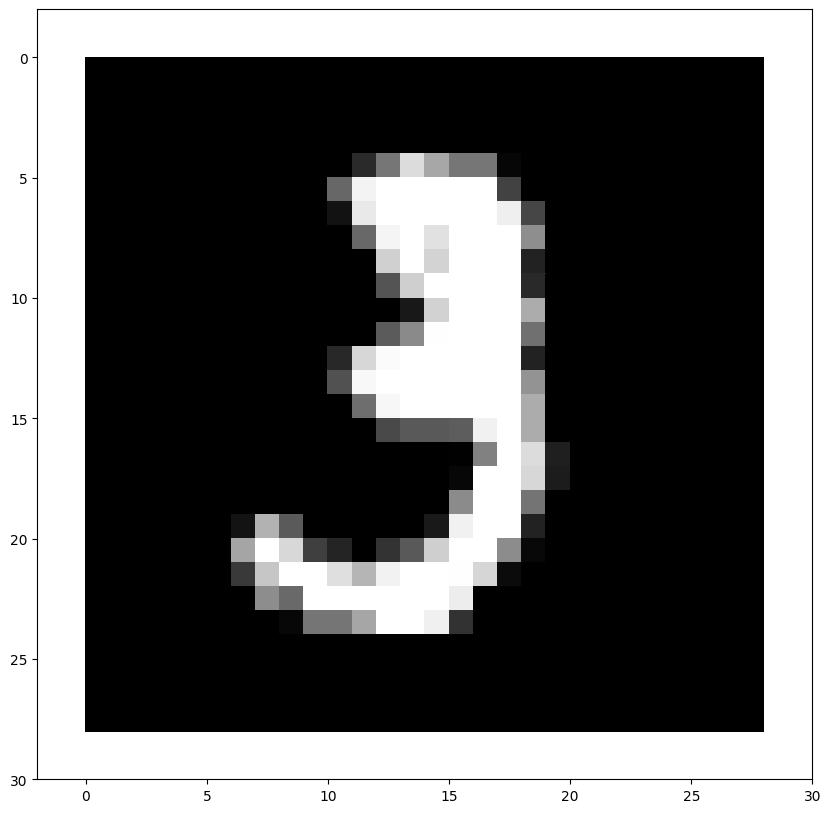

In [30]:
for height in range(img_height - 3):
    for width in range(img_width - 3):
        img_scan = img_x[height:height+3, width:width+3]
        vertical_edge[height + 1, width + 1] = np.dot(img_scan.reshape(-1), vertical_edge_filter.reshape(-1))
        horizontal_edge[height + 1, width + 1] = np.dot(img_scan.reshape(-1), horizontal_edge_filter.reshape(-1))

print(vertical_edge)

plt.figure(figsize=(10, 10))
plt.gray()
plt.pcolor(img_x)
plt.xlim(-2, 30)
plt.ylim(30, -2)